Accuracy on test set: 0.856353591160221

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.91      0.92       801
           1       0.39      0.42      0.40       104

    accuracy                           0.86       905
   macro avg       0.66      0.67      0.66       905
weighted avg       0.86      0.86      0.86       905



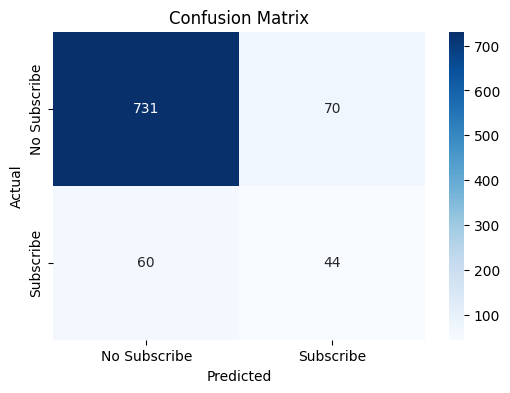

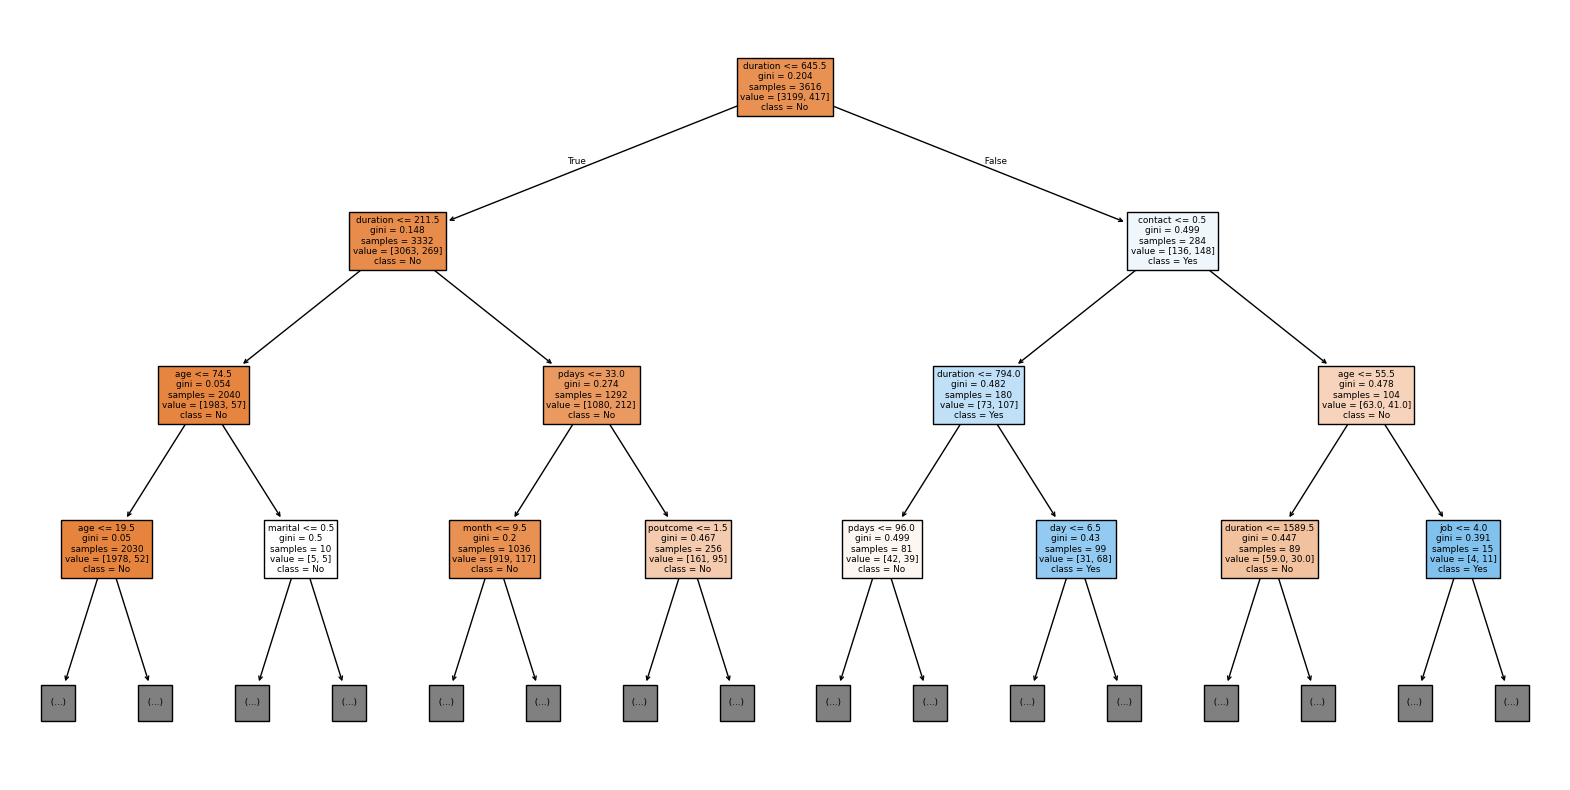

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv('task3.csv', sep=';', quotechar='"')

# Convert target variable 'y' from yes/no to 1/0
df['y'] = df['y'].map({'yes': 1, 'no': 0})

# Separate features and target
X = df.drop('y', axis=1)
y = df['y']

# Identify categorical columns to encode
cat_cols = X.select_dtypes(include=['object']).columns.tolist()

# Encode categorical columns using LabelEncoder
le_dict = {}
for col in cat_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    le_dict[col] = le  # store encoder if needed later

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

# Initialize Decision Tree classifier
dtc = DecisionTreeClassifier(random_state=42)

# Train model
dtc.fit(X_train, y_train)

# Predict on test data
y_pred = dtc.predict(X_test)

# Evaluate
print("Accuracy on test set:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix heatmap
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Subscribe', 'Subscribe'],
            yticklabels=['No Subscribe', 'Subscribe'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Optional: Visualize the decision tree (limited depth for readability)
plt.figure(figsize=(20,10))
plot_tree(dtc, feature_names=X.columns, class_names=['No','Yes'], filled=True, max_depth=3)
plt.show()
